In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import numpy as np
import os
import scipy.io

# Reading the data

In [5]:
# loading mat file 
mat = scipy.io.loadmat(os.path.join('F:\\learning\\Mechanical\\Brantun\\Git\\databook_python\\DATA', 'allFaces.mat'))

faces = mat['faces'] # all faces is a 2D array
m = int(mat['m']) # width of each face
n = int(mat['n']) # height of each face
nfaces = np.ndarray.flatten(mat['nfaces']) # the number of columns corresponding to a person


In [69]:
faces.shape

(32256, 2410)

# Data visualization

(-0.5, 167.5, 191.5, -0.5)

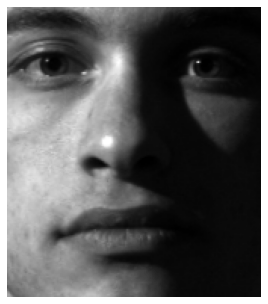

In [70]:
# Plotting one face
a = np.reshape(faces[: , 1024],(m,n))  # 1024th face of 2410 faces

fig1 = plt.figure() # create a figure
ax1 = fig1.add_subplot(121) # create a subplot
img_avg = ax1.imshow(a.T) # plot the rotated image
img_avg.set_cmap('gray') # set the color map
plt.axis('off') # turn off the axis

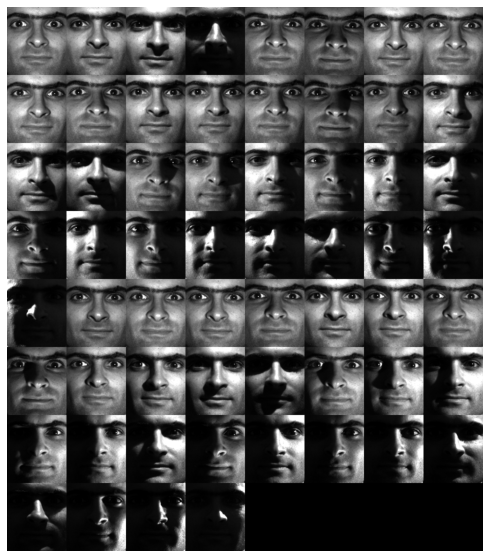

In [72]:
# plotting all faces of the same person
p = 10 # the person's number in the sequence
subset = faces[:,sum(nfaces[:p]) : sum(nfaces[:(p+1)])] # all pictures of the person p

allFaces = np.zeros((n*8,m*8))  # create a matrix of zeros of size 8x8 (8 rows and 8 columns)

count = 0 # count the number of pictures

for j in range(8): # loop over the rows
    for k in range(8): # loop over the columns
        if count < nfaces[p]: # if count is less than the number of pictures of the person p
            allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T # add the picture to the matrix
            count += 1 # increment the count
            
img = plt.imshow(allFaces) # plot the matrix
img.set_cmap('gray') # set the color map
plt.axis('off') # turn off the axis
plt.show() # show the figure

# the eigenfaces

(-0.5, 167.5, 191.5, -0.5)

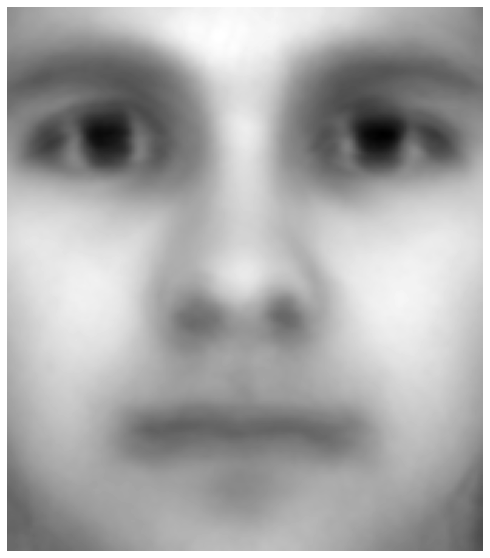

In [74]:
trainingFaces = faces[:,:np.sum(nfaces[:36])] # extract the training faces(36 persons)
avgFace = np.mean(trainingFaces,axis=1) # compute the average of the training faces

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

In [83]:
X = trainingFaces - avgFace.reshape(-1,1) # subtract the average face from the training faces using broadcasting
U, S, VT = np.linalg.svd(X,full_matrices=0)

array([[ 18.54776512,  32.54776512,  -2.45223488, ..., -60.45223488,
        -59.45223488, -59.45223488],
       [ 18.98860649,  24.98860649,   4.98860649, ..., -61.01139351,
        -60.01139351, -60.01139351],
       [ 17.73970202,  25.73970202,   3.73970202, ..., -61.26029798,
        -61.26029798, -59.26029798],
       ...,
       [-27.20464505, -34.20464505, -35.20464505, ..., -41.20464505,
        -41.20464505, -41.20464505],
       [-27.97589833, -32.97589833, -35.97589833, ..., -41.97589833,
        -41.97589833, -41.97589833],
       [-31.38825592, -34.38825592, -35.38825592, ..., -42.38825592,
        -42.38825592, -42.38825592]])